# Análise de sentimento: prática (parte 2)
Este notebook é parte da documentação de uma exploração de dados realizada para o artigo _**O uso da Cloroquina no tratamento da Covid-19 debatido no Facebook**: um estudo em opinião pública com processamento de linguagem natural_.

Para calcular o sentimento, o TextBlob calcula _polaridade_ e _subjetividade_ tirando uma média dos valores atribuídos aos termos usados no texto analisado. [Neste link](https://planspace.org/20150607-textblob_sentiment/) tem uma explicação de como isso funciona por debaixo dos panos.

Como a análise com o corpus em português não foi pra frente e a análise com aprendizagem de máquina também não, vou adotar uma estratégia recomendada por Mohammad (2017) de traduzir o corpus. Sinceramente, eu acho meio porco 🐷 fazer assim, por motivos de tradução automática, mas se os principais pesquisadores da área estão fazendo dessa forma quem sou eu pra botar defeito, né?

## Importando os dados
O procedimento de sempre.

In [3]:
# montando o Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Caminho dos arquivos
!ls '/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/conteúdo'

content1.csv  content3.csv  content5.csv  content7.csv
content2.csv  content4.csv  content6.csv


In [5]:
# lendo os dados
data1 = open('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/conteúdo/content1.csv')
data1 = data1.read()

data2 = open('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/conteúdo/content2.csv')
data2 = data2.read()

data3 = open('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/conteúdo/content3.csv')
data3 = data3.read()

data4 = open('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/conteúdo/content4.csv')
data4 = data4.read()

data5 = open('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/conteúdo/content5.csv')
data5 = data5.read()

data6 = open('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/conteúdo/content6.csv')
data6 = data6.read()

data7 = open('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/conteúdo/content7.csv')
data7 = data7.read()

## Tradução automática do corpus
Estou usando aqui [uma implementação não oficial do Google Translate](https://py-googletrans.readthedocs.io/en/latest/) pra traduzir o corpus automaticamente. Também estou usando nossos conhecidos [NLTK](http://www.nltk.org/) e [TextBlob](https://textblob.readthedocs.io/en/dev/).

In [6]:
# instalando e importando as bibliotecas
!pip3 install googletrans
from googletrans import Translator, constants
from textblob import TextBlob
import nltk
nltk.download('punkt')

     |████████████████████████████████| 61kB 3.7MB/s 
     |████████████████████████████████| 972kB 12.2MB/s 
     |████████████████████████████████| 51kB 4.7MB/s 
     |████████████████████████████████| 71kB 5.5MB/s 
     |████████████████████████████████| 61kB 5.5MB/s 
     |████████████████████████████████| 102kB 7.3MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=4f75804e07595db0908e3e9292e5be585f009ee762f95d7afb46b8bb494bce6f
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=01ef794b6d1013e052e019a1108fc3bc6da5a840748771c360c85a2f9eb37c2a
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/pu

True

A versão abaixo foi baseada no retorno dos erros que o script anterior que eu havia desenvolvido gerava. Era um erro de atributo, cuja solução tá mais ou menos descrita [neste tópico do Stackoverflow](https://stackoverflow.com/questions/30963705/python-regex-attributeerror-nonetype-object-has-no-attribute-group/30964049). Para solucioná-lo, usei [try/except](https://www.w3schools.com/python/python_try_except.asp) para lidar com o erro sem comprometer o processamento.

In [8]:
# uma versão primária, aplicável a apenas 1 (01) dataset
inEnglish1 = []
teste1 = TextBlob(data1)

# essa função pega o dataset e traduz linha a linha
def transla(data):
  for sentence in data.sentences:
    translator = Translator()

    try:
      translation = translator.translate(sentence)
      inEnglish1.append(f'{translation.text}')

    except AttributeError:
      print("ops")

  return inEnglish1

transla(teste1)

ops
ops
ops
ops
ops
ops
ops
ops
ops
ops
ops
ops
ops
ops
ops
ops
ops
ops
ops
ops
ops
ops
ops
ops
ops
ops
ops
ops
ops
ops


['Content\nWere the cases serious?',
 'Were they on respirators?',
 'B.C\nOnly severe cases are using chloroquine\nUp\nGlory to God!',
 'B.C\nGlory to God ❤️\n\nGod and wonder\nAmen\nAmen!!!',
 "That's why Brazil is not going forward\nAmen 🙏\nIt must be Feike!",
 '75 years old, in a serious condition and had even said goodbye to his family.',
 'https://www.uol.com.br/vivabem/noticias/redacao/2020/03/22/mae-de-donos-da-prevent-senior-e-tratada-com-cloroquina-temos-esperanca.htm Mother of owners of Prevent Senior is treated with chloroquine: "We have hope" UOL.COM.BR Mother of owners of Prevent Senior is treated with chloroquine: "We have hope" Mother of owners of Prevent Senior is treated with chloroquine: "We have hope"\nhe will hardly post something fake.',
 'Stop thinking negative.',
 'That is why Brazil is not going forward 1\nThis is for those who can prove that they have the virus.',
 '🙏🏼 🙏🏼 🙏🏼\nRemembering that it is not only the use of chloroquine\nIt is in conjunction with Azit

In [10]:
# uma versão tunnada do script acima
inEnglish1 = []
inEnglish2 = []
inEnglish3 = []
inEnglish4 = []
inEnglish5 = []
inEnglish6 = []
inEnglish7 = []

blob1 = TextBlob(data1)
blob2 = TextBlob(data2)
blob3 = TextBlob(data3)
blob4 = TextBlob(data4)
blob5 = TextBlob(data5)
blob6 = TextBlob(data6)
blob7 = TextBlob(data7)

# essa função pega o dataset e traduz linha a linha
def transla(data, n):
  for sentence in data.sentences:
    translator = Translator()

    try:
      translation = translator.translate(sentence)
      if n is 0: inEnglish1.append(f'{translation.text}')
      elif n is 1: inEnglish2.append(f'{translation.text}')
      elif n is 2: inEnglish3.append(f'{translation.text}')
      elif n is 3: inEnglish4.append(f'{translation.text}')
      elif n is 4: inEnglish5.append(f'{translation.text}')
      elif n is 5: inEnglish6.append(f'{translation.text}')
      elif n is 6: inEnglish7.append(f'{translation.text}')

    # apesar de algumas vezes dar umas merda, pelo menos não quebra o script
    except AttributeError: print('ops!')

  return print('tradução blob', n + 1, ': cabou!')

transla(blob1, 0)
transla(blob2, 1)
transla(blob3, 2)
transla(blob4, 3)
transla(blob5, 4)
transla(blob6, 5)
transla(blob7, 6)

ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
tradução blob 1 : cabou!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
tradução blob 2 : cabou!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
tradução blob 3 : cabou!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
tradução blob 4 : cabou!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!
ops!


Aeeeeeeeeeeee! Aparentemente deu tudo certo. Vamos ver como está esse conteúdo processado.

In [11]:
inEnglish7

["Ta with fear now closed with a lot of people no use anymore\nHe's an unprecedented shame\nshame is being robbed.",
 'also!',
 'Lula in jail and Bolsonaro in an asylum\nThere is no shame.',
 'The most certain is the recommendation of doctors even out there barring the medicines\neven with all the medium support is feeling sick with the chloroquine shit kkkkkkkkkkkkkkkkkkkkkkkkkk\nLook President with many people it worked out chloroquine does not heat useless people really sucks\nsource: disturbed little head\nyours only if it is\nSources: “voices from my head” not always so lucid.',
 'I loved you !!!!',
 "It's either fake or this creature is crazy.",
 'He isn’t a doctor kkkk ... he’s right!',
 'The meficre people my God has nothing to do\nHe took it, famous minutes took it, I know a lot of people who took it.',
 'IT IS FOR USE.',
 'WHO DOES RECOMMEND IS THE DOCTOR.',
 'Do you have a brain?',
 'He no longer recommends chloroquine.',
 'No photo description available.',
 'They only disto

## Análise de sentimento
Tudo certo, traduzido e funcionando. Agora, a condução da análise de sentimento propriamente dita e, adiante, a geração dos gráficos. A função abaixo é uma adaptação da anterior, atribuindo sentimento (polaridade e subjetividade) a cada linha traduzida. 

Cada linha dessas não exatamente corresponde a cada linha dos dataframes limpos e rotulados no repositório porque o TextBlob separa as sentenças por conta própria. Então infelizmente, a princípio, não dá pra casar com os dados rotulados de opinião, mas é uma das possibilidades futuras aqui.

In [12]:
sentimento1 = []
sentimento2 = []
sentimento3 = []
sentimento4 = []
sentimento5 = []
sentimento6 = []
sentimento7 = []

# essa função analisa sentimento linha a linha do documento
def sent(data, n):
  for i in data:
    i = TextBlob(i)

    # atribuindo e salvando polaridade e subjetividade separadamente
    if n is 0: sentimento1.append((i.sentiment.polarity, i.sentiment.subjectivity))
    elif n is 1: sentimento2.append((i.sentiment.polarity, i.sentiment.subjectivity))
    elif n is 2: sentimento3.append((i.sentiment.polarity, i.sentiment.subjectivity))
    elif n is 3: sentimento4.append((i.sentiment.polarity, i.sentiment.subjectivity))
    elif n is 4: sentimento5.append((i.sentiment.polarity, i.sentiment.subjectivity))
    elif n is 5: sentimento6.append((i.sentiment.polarity, i.sentiment.subjectivity))
    elif n is 6: sentimento7.append((i.sentiment.polarity, i.sentiment.subjectivity))

  return print('funfou!')
  
sent(inEnglish1, 0)
sent(inEnglish2, 1)
sent(inEnglish3, 2)
sent(inEnglish4, 3)
sent(inEnglish5, 4)
sent(inEnglish6, 5)
sent(inEnglish7, 6)

funfou!
funfou!
funfou!
funfou!
funfou!
funfou!
funfou!


In [13]:
sentimento7

[(0.25, 0.5),
 (0.0, 0.0),
 (-0.1, 0.0),
 (-0.0763888888888889, 0.580952380952381),
 (1.0, 0.8),
 (-0.55, 0.95),
 (0.3571428571428571, 0.5357142857142857),
 (0.5, 1.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.4, 0.4),
 (0.0, 1.0),
 (-0.8749999999999998, 0.6666666666666666),
 (0.1875, 0.6499999999999999),
 (-0.09375, 0.25),
 (0.0, 0.0),
 (0.01666666666666668, 0.525),
 (0.0, 0.0),
 (1.0, 0.3),
 (0.203125, 0.46875),
 (0.0, 0.6),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.06933333333333334, 0.48900000000000005),
 (-0.375, 0.4),
 (0.0, 0.0),
 (-0.041666666666666664, 0.6666666666666666),
 (-0.13020833333333331, 0.22083333333333333),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.03333333333333333, 0.4861111111111111),
 (0.0, 0.0),
 (0.04434523809523809, 0.544345238095238),
 (0.2, 0.5399999999999999),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.5580357142857142, 0.5357142857142857),
 (-0.3333333333333333, 0.38888888888888884),
 (-0.41666666666666663, 0.6666666666666666),
 (0.1, 0.1

Pronto! Provavelmente essa análise é meio porca por conta da impossibilidade de uma tradução automática captar expressões e sutilezas, mas se é como a galera da área tá fazendo com idiomas que não são tão populares quanto o inglês, é assim que eu vou fazer também.

Preciso dar um jeito de pegar todas as polaridades e sentimentos de modo separado, porque cada linha gera um ponto no gráfico, e o [MatPlotLib](https://matplotlib.org/) pega cada valor desse separado. Talvez se eu transpor essa "tabela" facilite a parada porque aí eu posso pegar colunas inteiras.

In [14]:
sentimento7[0]

(0.25, 0.5)

Alguém perguntou [nessa thread do Stackverflow](https://stackoverflow.com/questions/43437240/pythonic-way-to-flip-a-list-tuple) por um jeito pythônico de flippar uma lista de listas, e sugeriram usar [uma opção do NumPy](https://numpy.org/devdocs/reference/generated/numpy.ndarray.T.html). Não sei que formato de número é esse aí não, mas vou tocar o barco.

In [15]:
# importando numpy pra transpor as listas
import numpy as np

# afe, não sei que formato é esse de número não! Mas é coisa do Numpy
senti1 = np.array(sentimento1).T
senti2 = np.array(sentimento2).T
senti3 = np.array(sentimento3).T
senti4 = np.array(sentimento4).T
senti5 = np.array(sentimento5).T
senti6 = np.array(sentimento6).T
senti7 = np.array(sentimento7).T
senti1

array([[-3.33333333e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -1.00000000e-01,  0.00000000e+00,
         0.00000000e+00, -1.16666667e-01, -3.95833333e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  5.46875000e-01,
        -5.00000000e-01,  0.00000000e+00, -7.14285714e-01,
         1.78571429e-01, -1.64444444e-01,  0.00000000e+00,
         0.00000000e+00,  3.50000000e-01, -1.46666667e-01,
         5.00000000e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  6.00000000e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         2.50000000e-01,  3.50000000e-01,  4.37500000e-01,
         4.16666667e-02,  2.70833333e-02, -1.41666667e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  5.00000000e-01,
        -1.00000000e-01, -2.50000000e-01,  3.00000000e-01,
        -1.58333333e-01, -7.50000000e-02,  7.00000000e-0

In [16]:
# segunda coluna da tabela depois de transposta
senti1[1]

array([0.66666667, 0.        , 1.        , 0.        , 0.4       ,
       0.        , 0.        , 0.43333333, 0.77083333, 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.65      ,
       0.9       , 0.625     , 0.85714286, 0.76785714, 0.78888889,
       0.        , 0.        , 0.65      , 0.81333333, 0.5       ,
       0.        , 0.        , 0.        , 0.8       , 0.        ,
       0.        , 0.        , 0.        , 0.2       , 0.65      ,
       0.65      , 0.58333333, 0.66458333, 0.525     , 0.125     ,
       0.        , 0.5       , 0.        , 1.        , 0.5       ,
       0.31770833, 1.        , 0.8       , 0.43333333, 0.825     ,
       0.6       , 0.625     , 0.        , 0.2       , 0.52934524,
       0.55555556, 0.5       , 0.5       , 0.        , 0.2       ,
       0.53571429, 0.        , 0.65      , 0.        , 1.        ,
       0.6       , 0.        , 0.57      , 0.        , 0.        ,
       1.        , 0.        , 0.3       , 1.        , 1.     

## Regressão Linear
Antes de gerar os [_scatter plots_](https://datavizcatalogue.com/methods/scatterplot.html) da análise de sentimento, precisamos ver como traçar a regressão linear a partir desses dados, pra ter justamente uma noção da tendência geral de cada cenário/thread de discussão. Não tem muito segredo, segundo esse [tutorial](https://www.kite.com/python/answers/how-to-plot-a-linear-regression-line-on-a-scatter-plot-in-python): MatPlotLib, NumPy e uma outra função deste último, o [polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html), dão conta do recado. Polyfit é justamente a função que vai fazer os cálculos que a gente precisa para traçar a linha de regressão nos gráficos. 

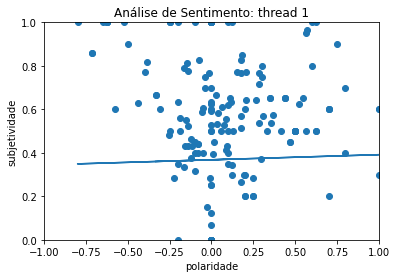

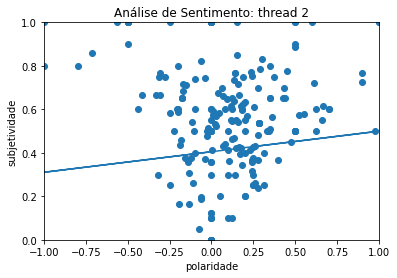

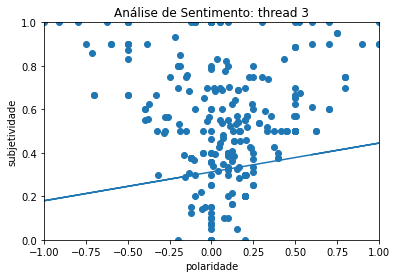

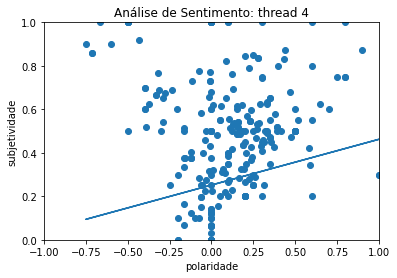

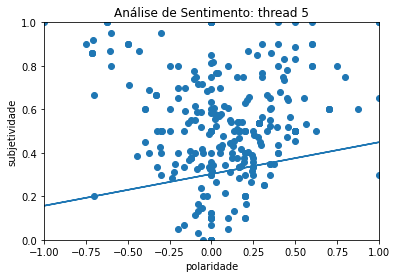

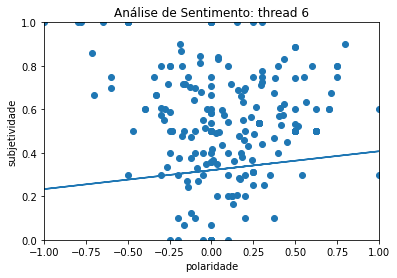

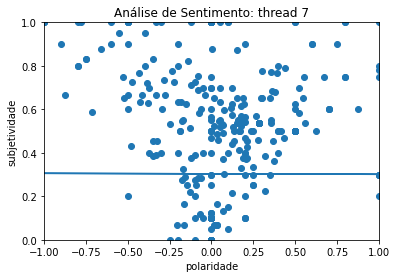

In [17]:
# importando matplotlib e o polyfit
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit

# primeiro gráfico
plt.title('Análise de Sentimento: thread 1')
plt.xlabel('polaridade')
plt.ylabel('subjetividade')
plt.scatter(senti1[0], senti1[1])     # esses dois valores são, respectivamente, x e y
plt.xlim(-1, 1)                       # polaridade: negative vs. positive       (-1.0 => +1.0)
plt.ylim(0, 1)                        # subjetividade: objective vs. subjective (+0.0 => +1.0)

b1, m1 = polyfit(senti1[0], senti1[1], 1)
plt.plot(senti1[0], m1 * senti1[0] + b1)
plt.show()

# segundo gráfico
plt.title('Análise de Sentimento: thread 2')
plt.xlabel('polaridade')
plt.ylabel('subjetividade')
plt.scatter(senti2[0], senti2[1])     # esses dois valores são, respectivamente, x e y
plt.xlim(-1, 1)                       # polaridade: negative vs. positive       (-1.0 => +1.0)
plt.ylim(0, 1)                        # subjetividade: objective vs. subjective (+0.0 => +1.0)

b2, m2 = polyfit(senti2[0], senti2[1], 1)
plt.plot(senti2[0], m2 * senti2[0] + b2)
plt.show()

# terceiro gráfico
plt.title('Análise de Sentimento: thread 3')
plt.xlabel('polaridade')
plt.ylabel('subjetividade')
plt.scatter(senti3[0], senti3[1])     # esses dois valores são, respectivamente, x e y
plt.xlim(-1, 1)                       # polaridade: negative vs. positive       (-1.0 => +1.0)
plt.ylim(0, 1)                        # subjetividade: objective vs. subjective (+0.0 => +1.0)

b3, m3 = polyfit(senti3[0], senti3[1], 1)
plt.plot(senti3[0], m3 * senti3[0] + b3)
plt.show()

# quarto gráfico
plt.title('Análise de Sentimento: thread 4')
plt.xlabel('polaridade')
plt.ylabel('subjetividade')
plt.scatter(senti4[0], senti4[1])     # esses dois valores são, respectivamente, x e y
plt.xlim(-1, 1)                       # polaridade: negative vs. positive       (-1.0 => +1.0)
plt.ylim(0, 1)                        # subjetividade: objective vs. subjective (+0.0 => +1.0)

b4, m4 = polyfit(senti4[0], senti4[1], 1)
plt.plot(senti4[0], m4 * senti4[0] + b4)
plt.show()

# quinto gráfico
plt.title('Análise de Sentimento: thread 5')
plt.xlabel('polaridade')
plt.ylabel('subjetividade')
plt.scatter(senti5[0], senti5[1])     # esses dois valores são, respectivamente, x e y
plt.xlim(-1, 1)                       # polaridade: negative vs. positive       (-1.0 => +1.0)
plt.ylim(0, 1)                        # subjetividade: objective vs. subjective (+0.0 => +1.0)

b5, m5 = polyfit(senti5[0], senti5[1], 1)
plt.plot(senti5[0], m5 * senti5[0] + b5)
plt.show()

# sexto gráfico
plt.title('Análise de Sentimento: thread 6')
plt.xlabel('polaridade')
plt.ylabel('subjetividade')
plt.scatter(senti6[0], senti6[1])     # esses dois valores são, respectivamente, x e y
plt.xlim(-1, 1)                       # polaridade: negative vs. positive       (-1.0 => +1.0)
plt.ylim(0, 1)                        # subjetividade: objective vs. subjective (+0.0 => +1.0)

b6, m6 = polyfit(senti6[0], senti6[1], 1)
plt.plot(senti6[0], m6 * senti6[0] + b6)
plt.show()

# sétimo gráfico
plt.title('Análise de Sentimento: thread 7')
plt.xlabel('polaridade')
plt.ylabel('subjetividade')
plt.scatter(senti7[0], senti7[1])     # esses dois valores são, respectivamente, x e y
plt.xlim(-1, 1)                       # polaridade: negative vs. positive       (-1.0 => +1.0)
plt.ylim(0, 1)                        # subjetividade: objective vs. subjective (+0.0 => +1.0)

b7, m7 = polyfit(senti7[0], senti7[1], 1)
plt.plot(senti7[0], m7 * senti7[0] + b7)
plt.show()

Espero que não tenha ficado uma tradução muito tronxa pro inglês. Com a análise de sentimento em português, ele mal conseguia atribuir valores, muita coisa _claramente sentimental_ no material recebia valor zero; em inglês, pelo menos já deu pra ver uns padrões aqui. Coloquei uns rótulos pra ajudar na leitura dos eixos e títulos.

Enfim, o que deu pra notar: o formato de triângulo invertido das expressões das opiniões das pessoas. [Aparentemente](http://www.lrec-conf.org/proceedings/lrec2006/pdf/384_pdf.pdf), isso é um efeito normal de uma análise desse tipo (ESULI; SEBASTIANI, 2006) — como o formato da curva de Pareto foi na análise de léxico. A linha de regressão ajuda a visualizar as tendências dentro de cada tópico.

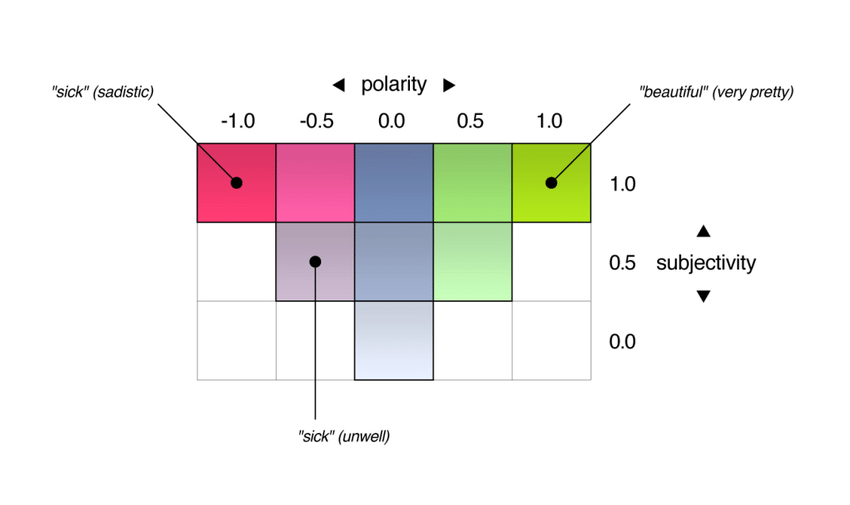

_Fonte da imagem: [ResearchGate](https://www.researchgate.net/figure/Triangle-representation-with-polarity-and-subjectivity-axes_fig2_264557244)_

Queria arrumar um jeito de integrar isso com os dados rotulados com a opinião das pessoas. Como é uma informação trinária (_a favor_, _contra_ e _neutro_ com relação ao uso da cloroquina no tratamento da Covid-19), talvez seja possível usar cores nos pontinhos de cada sentimento do _scatterplot_.

## Referências bibliográficas
ESULI, Andrea; SEBASTIANI, Fabrizio. "SENTIWORDNET: A Publicly Available Lexical Resource for Opinion Mining". In: **Proceedings of the Fifth International Conference on Language Resources and Evaluation (LREC’06)**, maio de 2006. Disponível em: http://www.lrec-conf.org/proceedings/lrec2006/pdf/384_pdf.pdf. Acesso em 21 de outubro de 2020.

MOHAMMAD, Saif M. "Challenges in Sentiment Analysis". In: CAMBRIA, Erik; DAS, Dipankar; BANDYOPADHYAY, Sivaji; FERACO, Antonio (ed.). **A Practical Guide to Sentiment Analysis**. Série Socio-Affective Computing, volume 5. Reino Unido: Springer, 2017.